<a href="https://colab.research.google.com/github/whistle-hikhi/CV-Background-Subtraction/blob/main/CV_Background_Subtraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import cv2
from google.colab.patches import cv2_imshow

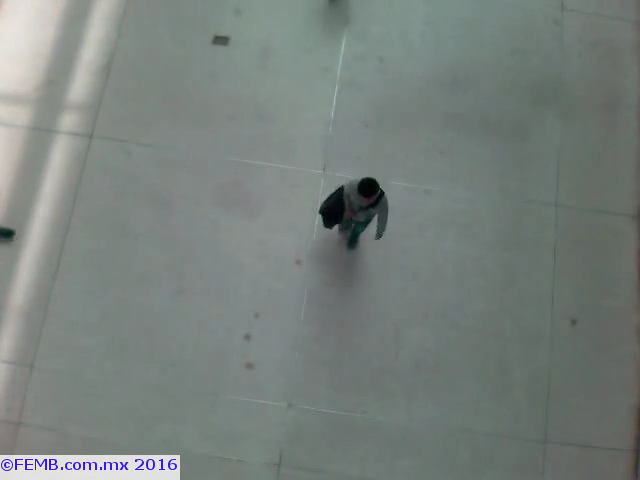

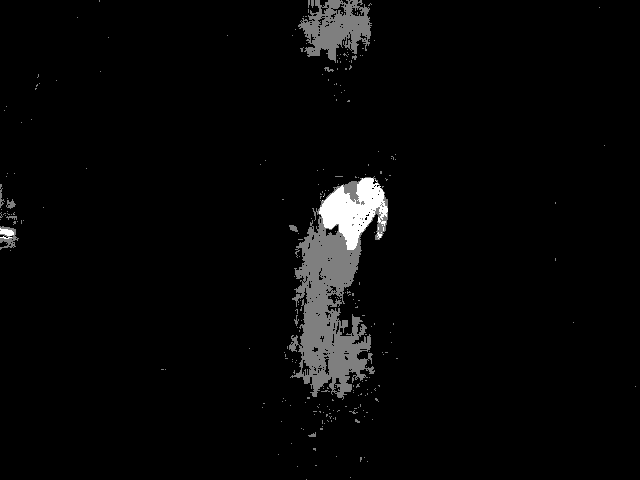

In [40]:
path_to_video = "/content/dataset.mp4"
fgbg = cv2.createBackgroundSubtractorMOG2()
capture = cv2.VideoCapture(path_to_video)

for i in range(100):
    (grabbed, frame) = capture.read()
    fgMask = fgbg.apply(frame)

cv2_imshow(frame)
cv2_imshow(fgMask)

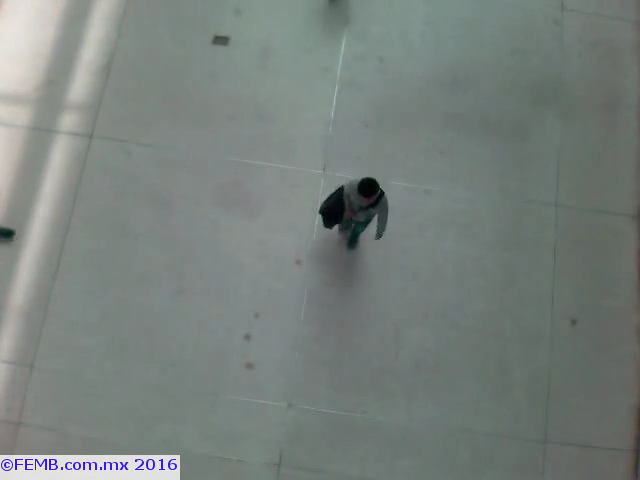

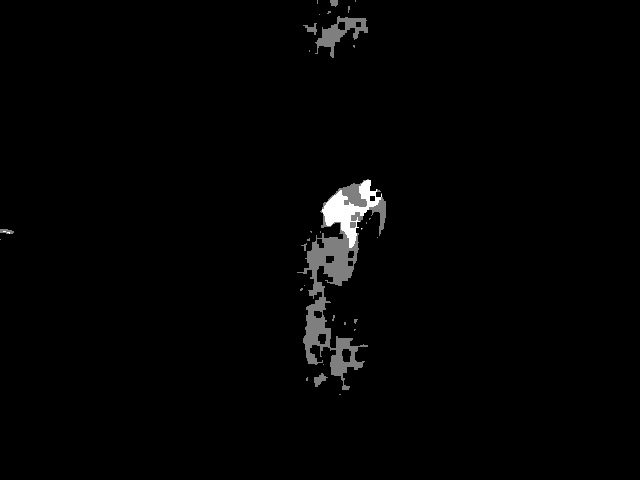

In [41]:
fgMask = cv2.erode(fgMask, None, iterations=2)
cv2_imshow(frame)
cv2_imshow(fgMask)

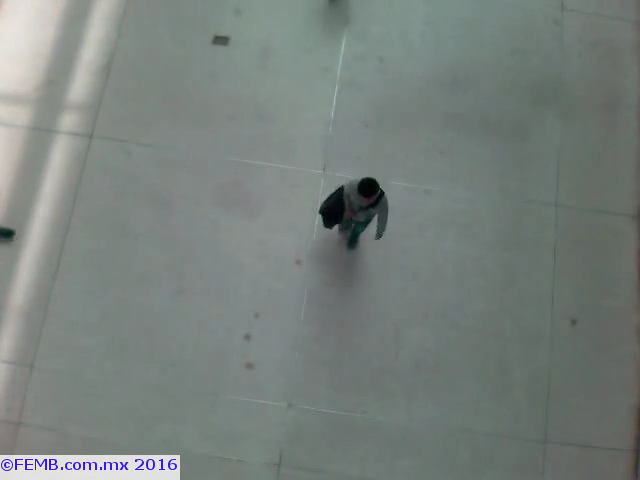

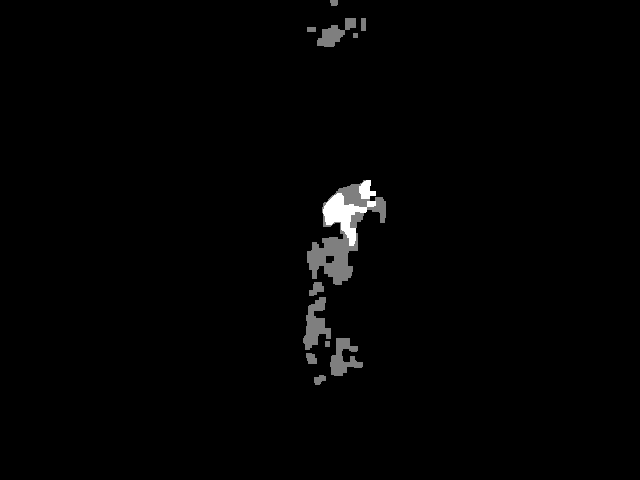

In [42]:
fgMask = cv2.erode(fgMask, None, iterations=2)
fgMask = cv2.dilate(fgMask, None, iterations=2)
cv2_imshow(frame)
cv2_imshow(fgMask)

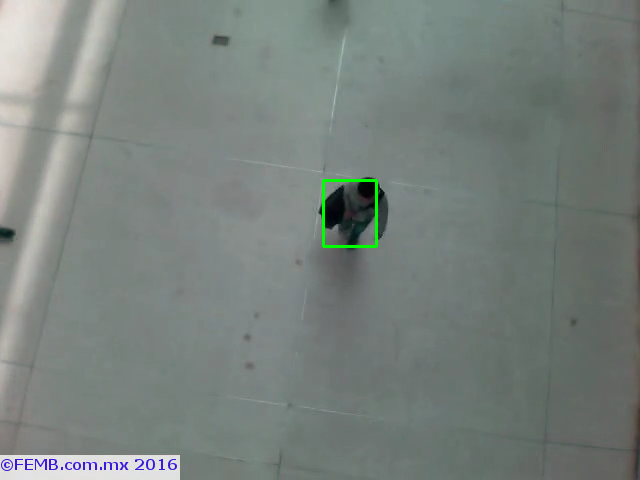

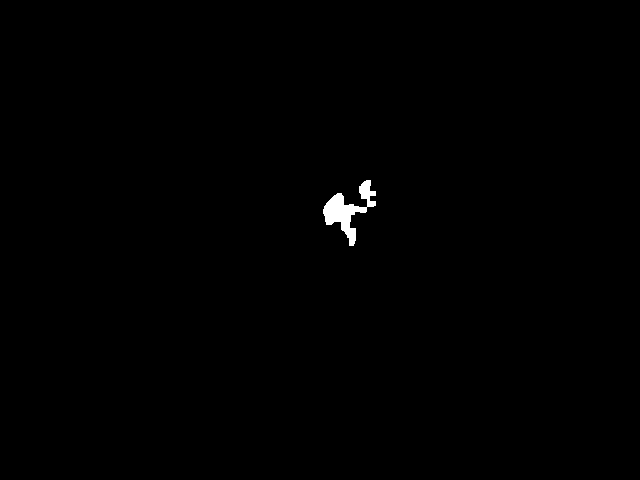

In [43]:
fgMask = cv2.threshold(fgMask, 200, 255, cv2.THRESH_BINARY)[1]
fgMask = cv2.dilate(fgMask, None, iterations=2)
fgMask = cv2.erode(fgMask, None, iterations=2)

contours_list, hierarchy = cv2.findContours(fgMask,
                                       cv2.RETR_TREE ,
                                       cv2.CHAIN_APPROX_SIMPLE) # Find contours
contours_result = []
for c in contours_list:
    if cv2.contourArea(c) < 1000:
        continue

    (x,y,w,h) = cv2.boundingRect(c)
    cv2.rectangle(frame, (x, y), (x+w,y+h), (0,255,0), 2)
    contours_result.append([x,y])

cv2_imshow(frame)
cv2_imshow(fgMask)

In [44]:
from google.colab.patches import cv2_imshow
from IPython.display import clear_output
from time import sleep

In [45]:
import imageio
from skimage.transform import resize
from IPython.display import HTML

In [46]:
(grabbed, frame) = capture.read()
fgMask = fgbg.apply(frame)
line = 280

contours_previous  = []
people_out = 0
people_in = 0
contours_now  = []
all_frame = []
all_fgMask = []
while True:

    contours_now  = []
    (grabbed, frame) = capture.read()

    if not grabbed:
        break

    fgMask = fgbg.apply(frame)

    cv2.putText(frame, str(capture.get(cv2.CAP_PROP_POS_FRAMES)) + "/433", (15, 15),
               cv2.FONT_HERSHEY_SIMPLEX, 0.5 , (255,0,0))

    fgMask = cv2.threshold(fgMask, 200, 255, cv2.THRESH_BINARY)[1]

    fgMask = cv2.dilate(fgMask, None, iterations=2)
    fgMask = cv2.erode(fgMask, None, iterations=2)

    contours_list, hierarchy = cv2.findContours(fgMask,
                                       cv2.RETR_TREE ,
                                       cv2.CHAIN_APPROX_SIMPLE) # Find contours
    for c in contours_list:
        if cv2.contourArea(c) < 1000:
            continue

        (x,y,w,h) = cv2.boundingRect(c)
        cv2.rectangle(frame, (x, y), (x+w,y+h), (0,255,0), 2)
        contours_now.append([x,y])

    if len(contours_previous) == 0:
        contours_previous = contours_now
        continue

    closest_contour_list = []


    for i in range (len(contours_now)):
        minimum = 1000000
        closest_contour = -1
        for k in range(len(contours_previous)):
            diff_x = contours_now[i][0] - contours_previous[k][0]
            diff_y = contours_now[i][1] - contours_previous[k][1]

            distance = diff_x**2 + diff_y**2
            if(distance < minimum and distance < 50):
                minimum = distance
                closest_contour = k

        closest_contour_list.append(closest_contour)

    for i in range (len(contours_now)):

        if (closest_contour_list[i] >= 0):
            y_previous = contours_previous[closest_contour_list[i]][1]
            if (contours_now[i][1] < line and y_previous >= line):
                people_out = people_out + 1

            if (contours_now[i][1] >= line and y_previous < line):
                people_in = people_in + 1

    contours_previous = contours_now


    cv2.line(frame, (0,line), (frame.shape[1], line), (0,255,255), 2)
    cv2.putText(frame,"People out: " +str(people_out), (15,40), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,0,255), 2)
    cv2.putText(frame,"People in: " +str(people_in), (14,80), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,0,255),2 )

    #show the current frame and the fg masks
    #cv2_imshow(frame)
    #cv2_imshow(fgMask)

    #clear_output()
    #cv2_imshow(frame)
    #cv2_imshow(fgMask)
    #sleep(0.5)
    all_frame.append(frame)
    all_fgMask.append(fgMask)
    ## [show]


In [47]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
def display_video(video):
    fig = plt.figure(figsize=(3,3))

    mov = []
    for i in range(len(video)):
        img = plt.imshow(video[i], animated=True)
        plt.axis('off')
        mov.append([img])

    anime = animation.ArtistAnimation(fig, mov, interval=50, repeat_delay=1000)
    plt.close()
    return anime

In [48]:
video = all_frame
HTML(display_video(video).to_html5_video())

In [49]:
video_seg = all_fgMask
HTML(display_video(video_seg).to_html5_video())